# DETECCIÓN DE PUNTOS (parte aruco)

In [1]:
import numpy as np
import cv2, PIL
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib nbagg

<IPython.core.display.Javascript object>


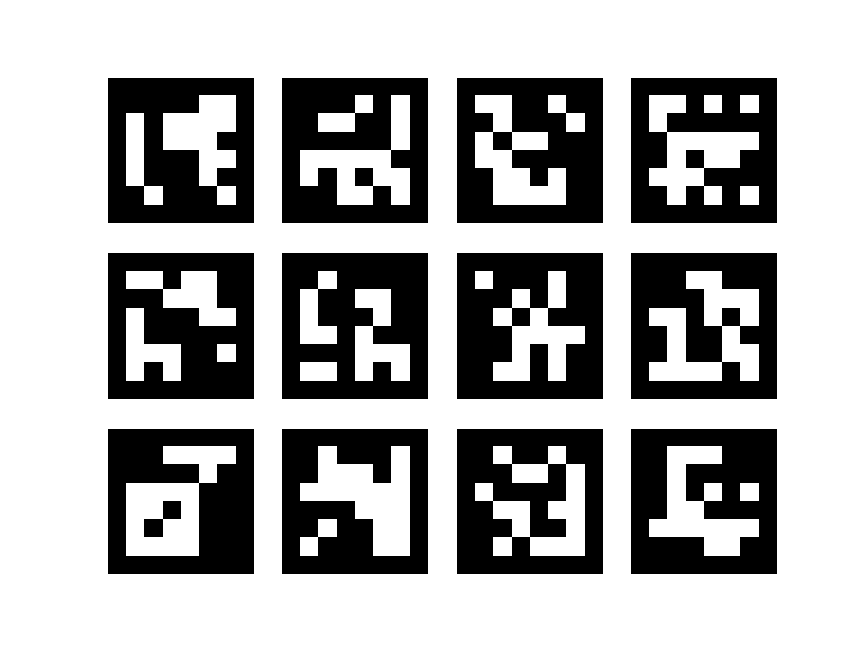

In [2]:
aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_6X6_250)

fig = plt.figure()
nx = 4
ny = 3
for i in range(1, nx*ny+1):
    ax = fig.add_subplot(ny,nx, i)
    img = aruco.generateImageMarker(aruco_dict, i, 700)
    plt.imshow(img, cmap = mpl.cm.gray, interpolation = "nearest")
    ax.axis("off")

plt.savefig("data/markers.pdf")    
plt.show()

<IPython.core.display.Javascript object>


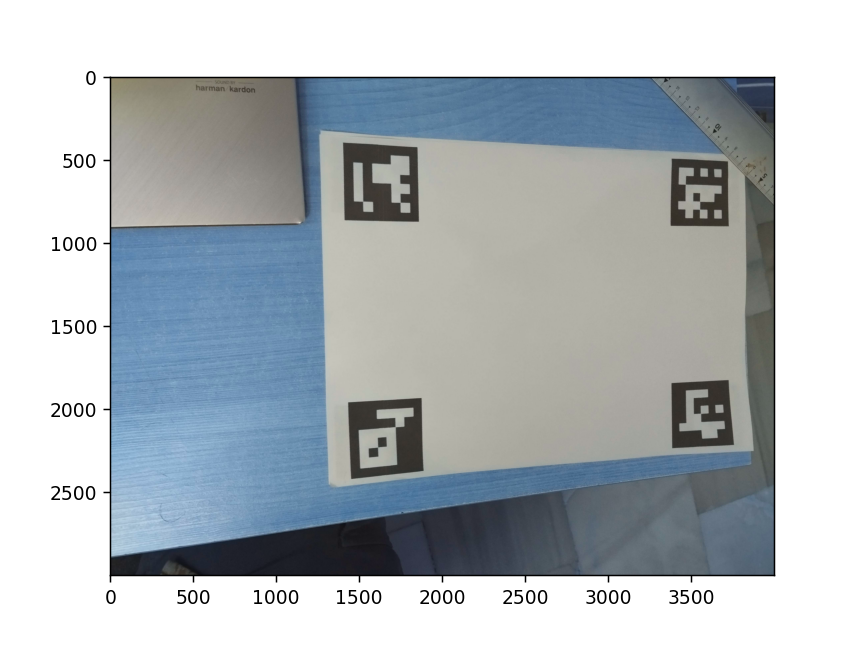

In [75]:
frame = cv2.imread("plantilla6.jpg")
plt.figure()
plt.imshow(frame)
plt.show()

In [76]:
%%time
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_6X6_250)
parameters =  aruco.DetectorParameters()
detector = aruco.ArucoDetector(aruco_dict, parameters)
corners, ids, rejectedImgPoints = detector.detectMarkers(gray)
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

CPU times: total: 172 ms
Wall time: 123 ms


<IPython.core.display.Javascript object>


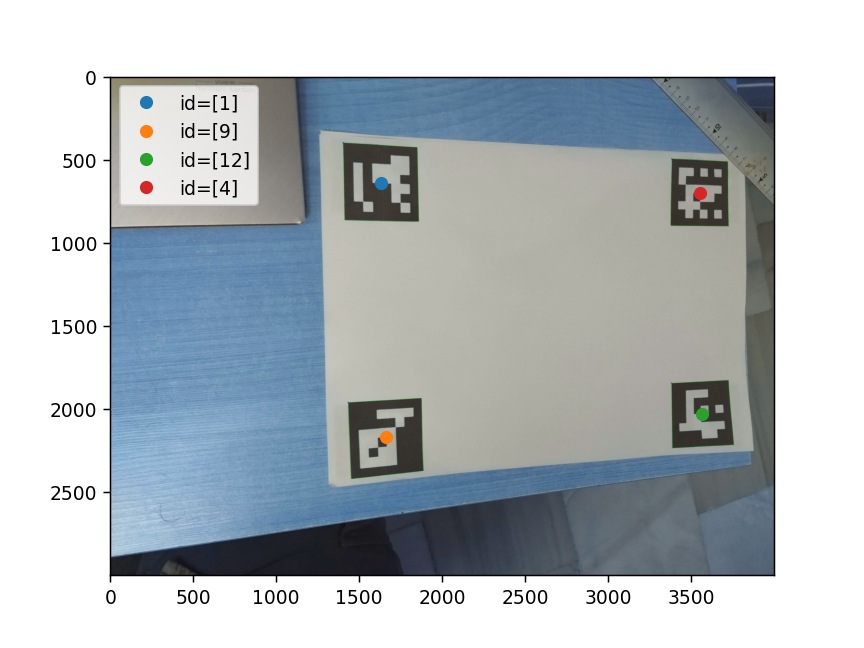

In [77]:
plt.figure()
plt.imshow(frame_markers)
for i in range(len(ids)):
    c = corners[i][0]
    plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "o", label = "id={0}".format(ids[i]))
plt.legend()
plt.show()

In [79]:
def quad_area(data):
    l = data.shape[0]//2
    corners = data[["c1", "c2", "c3", "c4"]].values.reshape(l, 2,4)
    c1 = corners[:, :, 0]
    c2 = corners[:, :, 1]
    c3 = corners[:, :, 2]
    c4 = corners[:, :, 3]
    e1 = c2-c1
    e2 = c3-c2
    e3 = c4-c3
    e4 = c1-c4
    a = -.5 * (np.cross(-e1, e2, axis = 1) + np.cross(-e3, e4, axis = 1))
    return a

corners2 = np.array([c[0] for c in corners])

data = pd.DataFrame({"x": corners2[:,:,0].flatten(), "y": corners2[:,:,1].flatten()},
                   index = pd.MultiIndex.from_product( 
                           [ids.flatten(), ["c{0}".format(i )for i in np.arange(4)+1]], 
                       names = ["marker", ""] ))


data = data.unstack().swaplevel(0, 1, axis = 1).stack()
data["m1"] = data[["c1", "c2"]].mean(axis = 1)
data["m2"] = data[["c2", "c3"]].mean(axis = 1)
data["m3"] = data[["c3", "c4"]].mean(axis = 1)
data["m4"] = data[["c4", "c1"]].mean(axis = 1)
data["o"] = data[["m1", "m2", "m3", "m4"]].mean(axis = 1)
print(data)
data

              c1      c2      c3      c4      m1      m2      m3      m4  \
marker                                                                     
1      x  1404.0  1851.0  1861.0  1413.0  1627.5  1856.0  1637.0  1408.5   
       y   395.0   423.0   870.0   861.0   409.0   646.5   865.5   628.0   
4      x  3384.0  3722.0  3726.0  3377.0  3553.0  3724.0  3551.5  3380.5   
       y   492.0   509.0   899.0   895.0   500.5   704.0   897.0   693.5   
9      x  1435.0  1877.0  1889.0  1453.0  1656.0  1883.0  1671.0  1444.0   
       y  1960.0  1934.0  2372.0  2421.0  1947.0  2153.0  2396.5  2190.5   
12     x  3382.0  3726.0  3759.0  3388.0  3554.0  3742.5  3573.5  3385.0   
       y  1844.0  1826.0  2215.0  2236.0  1835.0  2020.5  2225.5  2040.0   

                o  
marker             
1      x  1632.25  
       y   637.25  
4      x  3552.25  
       y   698.75  
9      x  1663.50  
       y  2171.75  
12     x  3563.75  
       y  2030.25  


c1      c2      c3      c4      m1      m2      m3      m4  \
marker                                                                     
1      x  1404.0  1851.0  1861.0  1413.0  1627.5  1856.0  1637.0  1408.5   
       y   395.0   423.0   870.0   861.0   409.0   646.5   865.5   628.0   
4      x  3384.0  3722.0  3726.0  3377.0  3553.0  3724.0  3551.5  3380.5   
       y   492.0   509.0   899.0   895.0   500.5   704.0   897.0   693.5   
9      x  1435.0  1877.0  1889.0  1453.0  1656.0  1883.0  1671.0  1444.0   
       y  1960.0  1934.0  2372.0  2421.0  1947.0  2153.0  2396.5  2190.5   
12     x  3382.0  3726.0  3759.0  3388.0  3554.0  3742.5  3573.5  3385.0   
       y  1844.0  1826.0  2215.0  2236.0  1835.0  2020.5  2225.5  2040.0   

                o  
marker             
1      x  1632.25  
       y   637.25  
4      x  3552.25  
       y   698.75  
9      x  1663.50  
       y  2171.75  
12     x  3563.75  
       y  2030.25

In [80]:
print('Aruco 1')
aruco1 = list(data.loc[(1, "c1")].values)
print(aruco1)

print('Aruco 4')
aruco4 = list(data.loc[(4, "c2")].values)
print(aruco4)

print('Aruco 12')
aruco12 = list(data.loc[(12, "c3")].values)
print(aruco12)

print('Aruco 9')
aruco9 = list(data.loc[(9, "c4")].values)
print(aruco9)

Aruco 1
[1404.0, 395.0]
Aruco 4
[3722.0, 509.0]
Aruco 12
[3759.0, 2215.0]
Aruco 9
[1453.0, 2421.0]


# POSICIÓN DE CÁMARA

########################1
focalLengthPixel 5120.000587346859
########################2


<IPython.core.display.Javascript object>


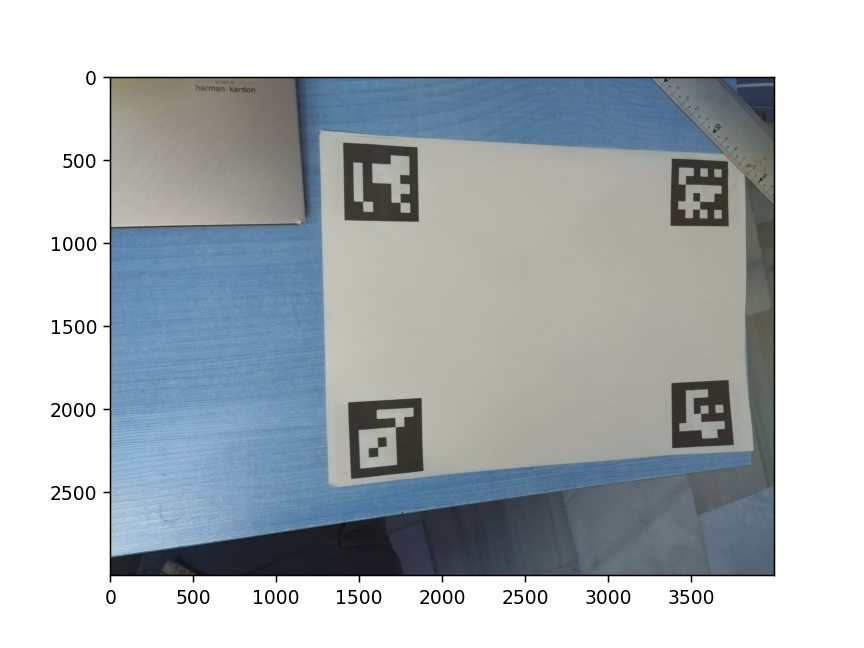

Posición de la cámara
x = [[-98.26681877]]
y = [[108.18005263]]
z = [[-506.35731008]]
Ángulo de la cámara
179.61401 -17.27642 -1.48944


In [81]:
import cv2
import numpy as np
import math
from scipy.spatial.transform import Rotation

def focalMM_to_focalPixel( focalMM, pixelPitch ):
    f = focalMM / pixelPitch
    return f

# Read Image
im = frame
size = im.shape

imageWidth = size[1]
imageHeight = size[0]
imageSize = [imageWidth, imageHeight]

points_2D = np.array([
                            (aruco1),     (aruco4),   
                            (aruco9),     (aruco12)     
                        ], dtype="double")


points_3D = np.array([
                            (0., 0., 0),     (270., 0., 0),     
                            (0., 202., 0),       (270., 202., 0)    
                        ])

focalLengthMM = 60
pixelPitch = 0.01171874865566988

print("########################1")

fLength = focalMM_to_focalPixel( focalLengthMM, pixelPitch )
print("focalLengthPixel", fLength)

K = np.array([(fLength, 0, imageWidth/2),     
               (0, fLength, imageHeight/2),     
               (0, 0, 1)])
distCoeffs = np.zeros((5,1))

print("########################2")

success, rvecs, tvecs = cv2.solvePnP(points_3D, points_2D, K, distCoeffs, flags=cv2.SOLVEPNP_ITERATIVE)

np_rodrigues = np.asarray(rvecs[:,:],np.float64)
rmat = cv2.Rodrigues(np_rodrigues)[0]
camera_position = -np.matrix(rmat).T @ np.matrix(tvecs)

#Test the solvePnP by projecting the 3D Points to camera
projPoints = cv2.projectPoints(points_3D, rvecs, tvecs, K, distCoeffs)[0]

for p in points_2D:
 cv2.circle(im, (int(p[0]), int(p[1])), 3, (0,255,0), -1)

for p in projPoints:
 cv2.circle(im, (int(p[0][0]), int(p[0][1])), 3, (255,0,0), -1)

plt.figure()
plt.imshow(im)

r = Rotation.from_rotvec([rvecs[0][0],rvecs[1][0],rvecs[2][0]])
rot = r.as_euler('xyz', degrees=True)

tx = camera_position[0][0]
ty = camera_position[1][0]
tz = camera_position[2][0]

rx = round(180-rot[0],5) 
ry = round(rot[1],5) 
rz = round(rot[2],5) 

print("Posición de la cámara")
print("x =", tx)
print("y =", ty)
print("z =", tz)
print("Ángulo de la cámara")
print(rx,ry,rz)